In [ ]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Add utils/ to path
utils_path = Path.cwd().parent / 'utils'
sys.path.append(str(utils_path))

from data_loader import *
from visualizer import *

In [2]:
# === Project paths ===
project_root = Path.cwd().parent
config_dir = project_root / 'config'
data_yaml = config_dir / 'MPP/data.yaml'

dataset_dir = project_root / "dataset"
IMAGE_DIR = dataset_dir / "MPP/images"
LABEL_DIR = dataset_dir / "MPP/labels"

# === Output dirs ===
VISUALS_ROOT = Path(project_root /"visuals")
REPORTS_ROOT = Path(project_root/ "reports")
NOTEBOOK_PHASE = "1_data_inspection"  # You can change this per notebook

SAVE_IMG_DIR = VISUALS_ROOT / NOTEBOOK_PHASE
SAVE_CSV_DIR = REPORTS_ROOT / NOTEBOOK_PHASE

SAVE_IMG_DIR.mkdir(parents=True, exist_ok=True)
SAVE_CSV_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
import os

print("Image dir exists?", os.path.exists(IMAGE_DIR))
print("Label dir exists?", os.path.exists(LABEL_DIR))

Image dir exists? True
Label dir exists? True


In [4]:
image_paths = get_image_paths(IMAGE_DIR)
print(f"DEBUG: Found {len(image_paths)} image(s) in {IMAGE_DIR}")

Found 36305 files for pattern *.jpg
DEBUG: Found 36305 image(s) in C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\dataset\MPP\images


In [8]:
dataset = YoloDataset(
    images_dir= IMAGE_DIR,
    labels_dir= LABEL_DIR,
    yaml_path= data_yaml
)

Loaded YAML config from C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\config\MPP\data.yaml: keys=['train', 'val', 'test', 'nc', 'names', 'roboflow']
Found 36305 files for pattern *.jpg


Generating label paths: 100%|██████████| 36305/36305 [00:00<00:00, 38458.96it/s]


Generated 36305 label paths from 36305 images


Loading label files: 100%|██████████| 36305/36305 [00:11<00:00, 3254.55it/s]

Loaded labels from 36305/36305 files.


In [10]:
image_paths = dataset.image_paths
label_paths = dataset.label_paths
all_labels = dataset.all_labels
class_names = dataset.class_names

In [57]:
# After loading your dataset
class_counts = Counter(int(l[0]) for labels in all_labels for l in labels)
total_labels = sum(class_counts.values())

📁 Saved image: C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\visuals\1_data_inspection\class_bar_chart.png


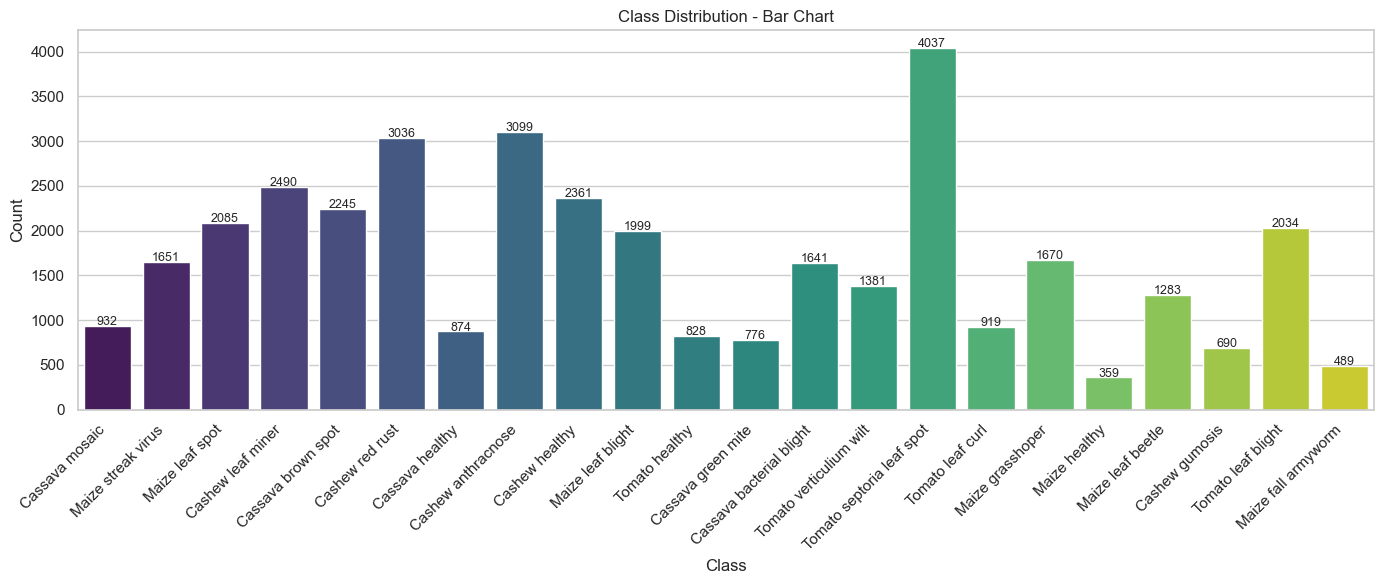

In [59]:
plot_class_counts(class_counts, class_names, SAVE_IMG_DIR)

📁 Saved image: C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\visuals\1_data_inspection\class_pie_chart.png


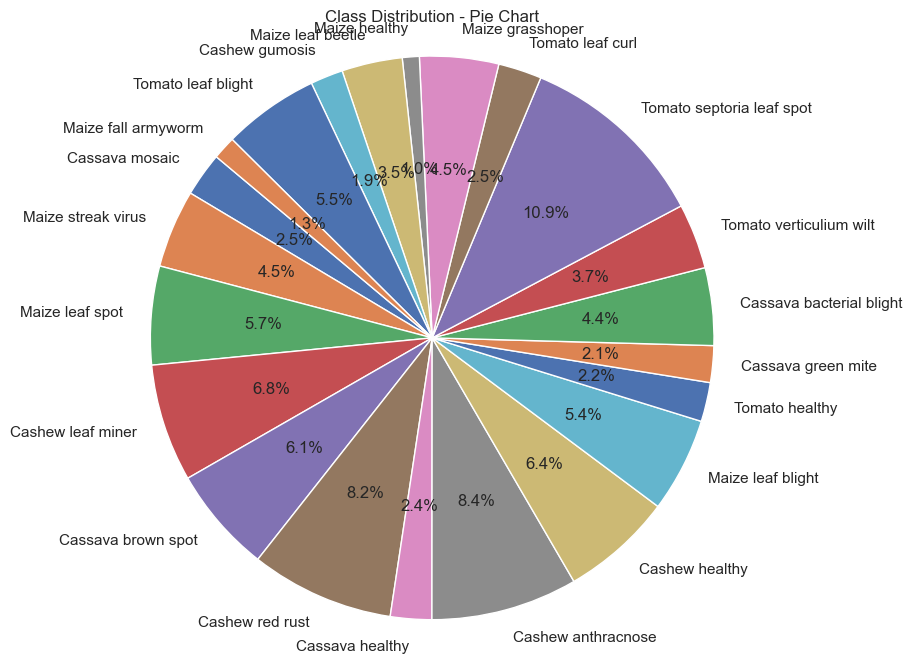

In [46]:
plot_class_distribution_pie(class_counts, class_names, SAVE_IMG_DIR)

In [47]:
df = generate_class_distribution_table(class_counts, class_names, SAVE_CSV_DIR)
df

📄 Saved CSV report: C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\reports\1_data_inspection\class_distribution.csv


📁 Saved image: C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\visuals\1_data_inspection\random_image_with_boxes.png


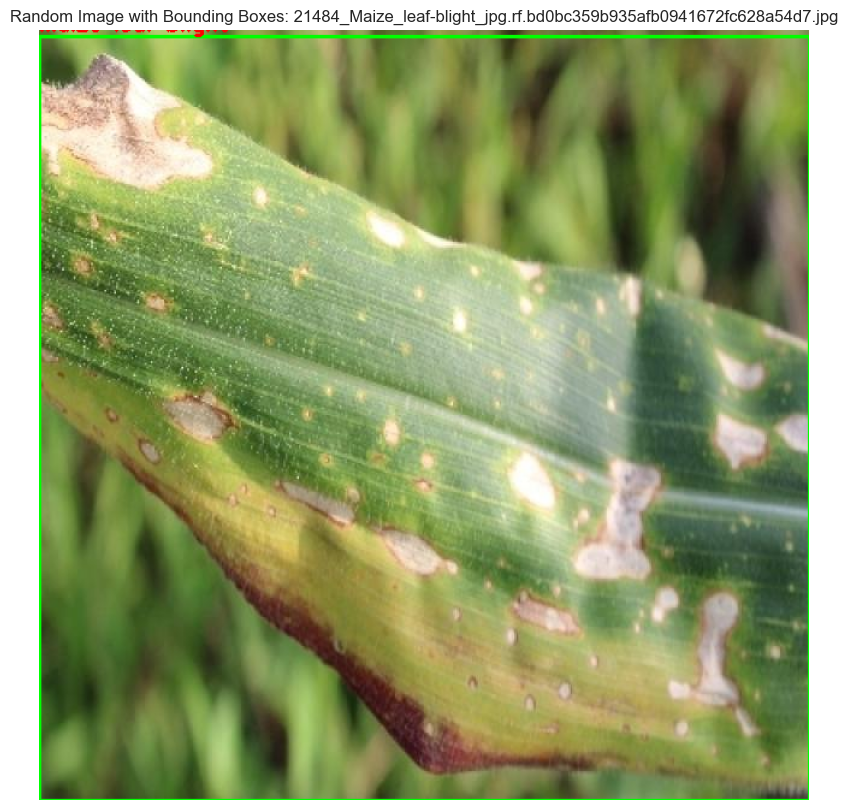

In [48]:
show_random_image_with_boxes(image_paths, all_labels, class_names, SAVE_IMG_DIR)

📁 Saved image: C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\visuals\1_data_inspection\random_image_with_boxes.png


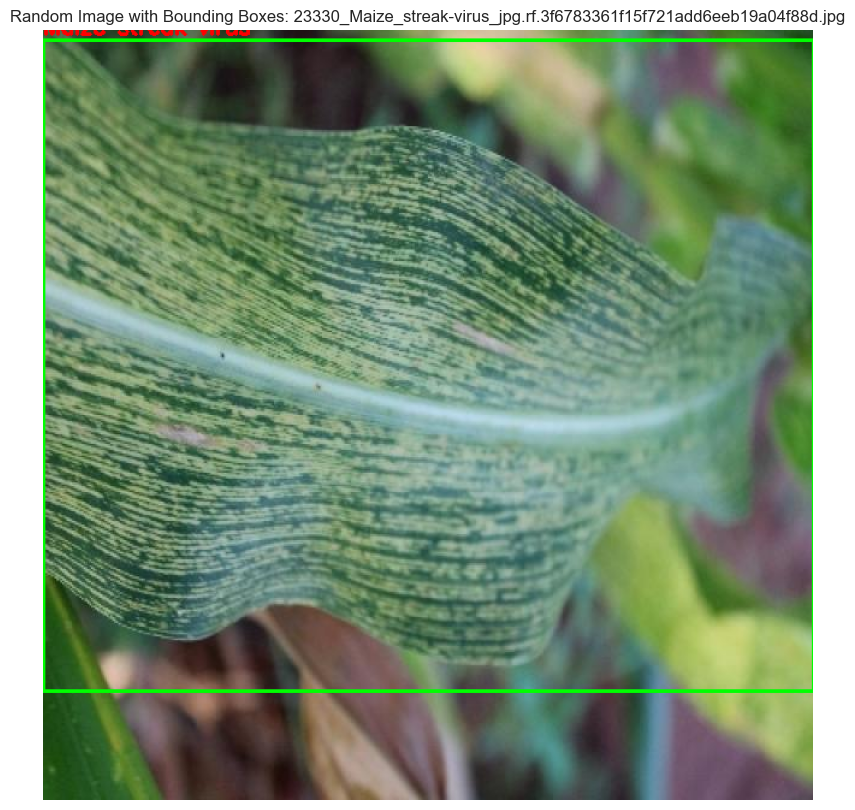

In [49]:
show_random_image_with_boxes(image_paths, all_labels, class_names, SAVE_IMG_DIR)

📁 Saved image: C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\visuals\1_data_inspection\bbox_size_distribution.png


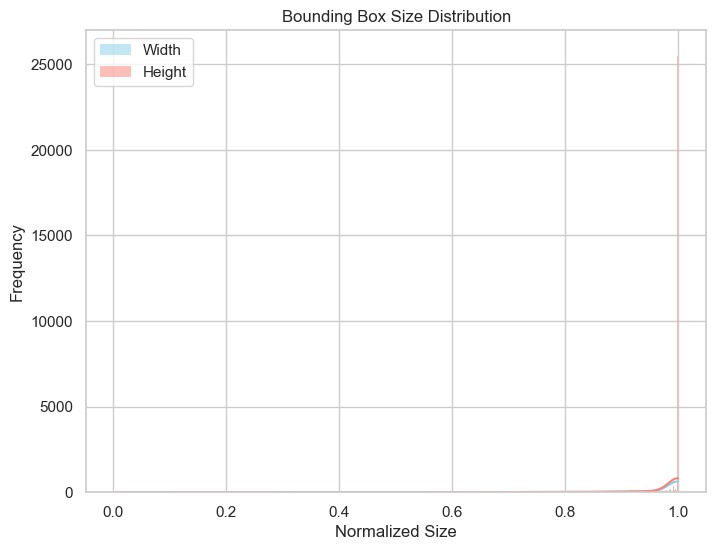

In [51]:
plot_bbox_size_distribution(all_labels, SAVE_IMG_DIR)

📁 Saved image: C:\Users\ADITHYA\OneDrive\Desktop\AgriVision\visuals\1_data_inspection\annotation_count_per_image.png


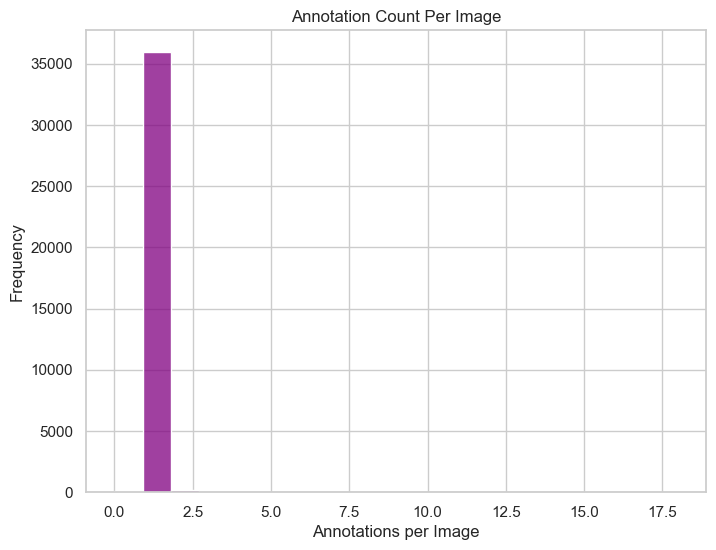

In [53]:
plot_annotation_count_per_image(all_labels, SAVE_IMG_DIR)